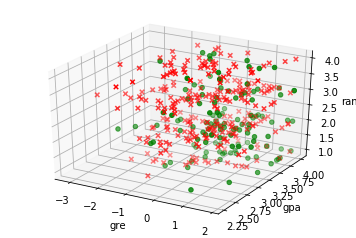

-------------- Batch Gradient Descent Result --------------
alpha: 0.005 , epoch: 350
theta: [[ 0.59862954  0.896919   -0.33476173 -0.15073906]]
MSE: 0.6207559724747777


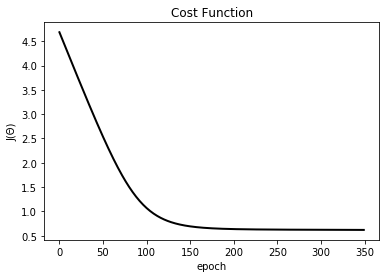

accuracy: 68.25%


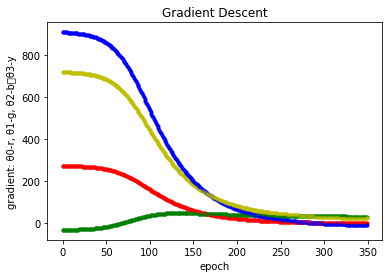


-------------- Stochastic Gradient Descent Result --------------
alpha: 0.005 , epoch: 400
theta: [[ 0.61063158  0.87401385 -0.28405283 -0.14407993]]
MSE: 0.6217938161368401


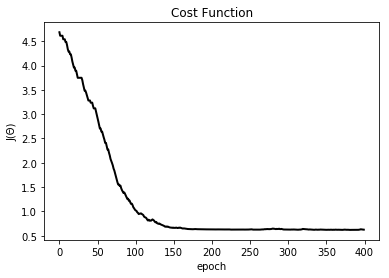

accuracy: 63.74999999999999%

-------------- sklearn Linear Regression Result --------------
theta: [[-1.0276504   0.00203747  0.43741392 -0.5864419 ]]
accuracy: 69.75%
Confusion matrix, without normalization
[[267   6]
 [115  12]]
Normalized confusion matrix
[[ 0.97802198  0.02197802]
 [ 0.90551181  0.09448819]]


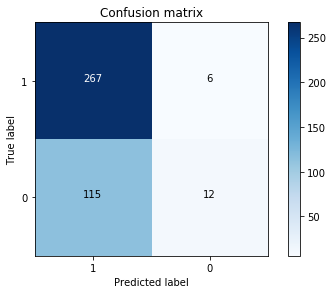

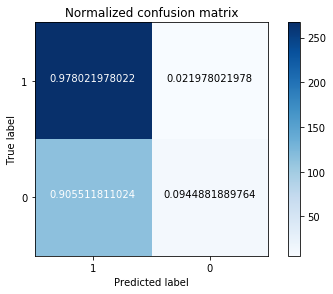


-------------- Batch Gradient Descent (Early Stopping) Result --------------
alpha: 0.05 , epoch: 1000
theta: [[ 0.61895767  0.51210119 -0.11009039 -0.43766888]]
MSE: 0.5860764300105876


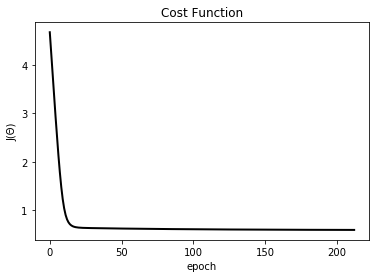

accuracy: 69.75%
earlyStopping: 40.0


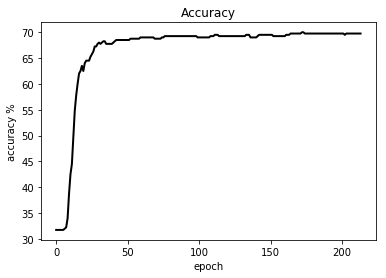

Confusion matrix, without normalization
[[257  16]
 [105  22]]
Normalized confusion matrix
[[ 0.94139194  0.05860806]
 [ 0.82677165  0.17322835]]


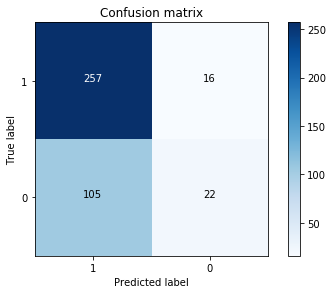

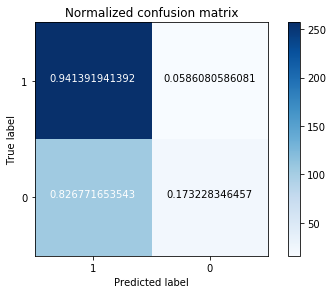

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 26 2017
Logistic Regression - Student Enrolling Admit
@author: cyrano
"""

import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix  

# 载入数据集
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('input/binary.csv', 'r')
    next(fr)
    
    for line in fr.readlines():
        lineArr = line.strip().split(',')
        dataMat.append([float(1), float(lineArr[1]), float(lineArr[2]), float(lineArr[3])])
        labelMat.append(int(lineArr[0]))
        
    return dataMat,labelMat

# 特征缩放 - 调节比例
def featureRescaling(mat,col):
    mat[:,col]=(mat[:,col]-mat[:,col].min())/(mat[:,col].max()-mat[:,col].min()) 
    return mat

# 特征缩放 - 标准化
def featureStandardization(mat,col):
    mat[:,col]=(mat[:,col]-mat[:,col].mean())/mat[:,col].std()
    return mat

# 激活函数 sigmoid
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

# 代价函数计算
def Cost(x_mat,y_mat,weights):
    h = sigmoid(x_mat * np.mat(weights))
    c1 = y_mat.transpose()*np.log(h)
    c2 = (1-y_mat).transpose()*np.log(1-h)
    cost = (-1 * float(c1) + -1 * float(c2))/m
    return cost

# 批量梯度下降
def batchGradDescent(x_mat,y_mat,alpha,maxCycles):
    weights = np.ones((n,1))
    
    for i in range(maxCycles):
        h = sigmoid(x_mat * np.mat(weights))
        error = h - y_mat
        cost = Cost(x_mat, y_mat, weights)
        gradient = x_mat.transpose() * error
        weights = weights - alpha / m * x_mat.transpose() * error
        
        all_grad.append(gradient.tolist())
        all_weight.append(weights.tolist())
        all_cost.append(cost)
    
    return weights

# 批量梯度下降(Early Stopping)
def batchGradDescentEarlyStopping(x_mat,y_mat,alpha,maxCycles,earlyStopping):
    weights = np.ones((n,1))
    accDescentCount = 0
    
    accBest = calcAccracy(x_mat, y_mat, weights)
    all_accuracy.append(accBest)
    
    for i in range(maxCycles):
        h = sigmoid(x_mat * np.mat(weights))
        error = h - y_mat
        cost = Cost(x_mat, y_mat, weights)
        gradient = x_mat.transpose() * error
        weights = weights - alpha / m * x_mat.transpose() * error
        acc = calcAccracy(x_mat, y_mat, weights)
                
        all_accuracy.append(acc)
        all_grad.append(gradient.tolist())
        all_weight.append(weights.tolist())
        all_cost.append(cost)
        
        if (acc >= accBest):
            accBest = acc
            accDescentCount=0
        else:
            accDescentCount+=1
        
        if (accDescentCount >= earlyStopping):
            break
              
    return weights

# 随机梯度下降
def stocGradDescent(x_mat,y_mat,alpha):
    weights = np.ones((n,1))

    for i in range(m):
        h= sigmoid(x_mat[i,:] * np.mat(weights))
        error =  h - y_mat[i,0]  
        cost = Cost(x_mat, y_mat, weights)
        gradient = x_mat[i,:].transpose() * error
        weights = weights - alpha * x_mat[i,:].transpose()*error 
        
        all_grad.append(gradient.tolist())
        all_weight.append(weights.tolist())
        all_cost.append(cost)
        
    return weights

#绘制代价函数示意图
def plotCost(all_cost):
    plt.plot(all_cost,'k-', label='line 1', linewidth=2)
    plt.ylabel("J(Θ)")
    plt.xlabel("epoch")
    plt.title("Cost Function")
    plt.show()   
    
#绘制梯度下降示意图
def plotGrad(all_grad):
    for i in range(len(all_grad)):
        plt.plot(i,(np.mat(all_grad[i]))[0],'r.')
        plt.plot(i,(np.mat(all_grad[i]))[1],'g.')
        plt.plot(i,(np.mat(all_grad[i]))[2],'b.')
        plt.plot(i,(np.mat(all_grad[i]))[3],'y.')
      
    plt.ylabel("gradient: θ0-r, θ1-g, θ2-b，θ3-y")
    plt.xlabel("epoch")   
    plt.title("Gradient Descent")    
    plt.show()

#绘制权重变化示意图
def plotWeight(all_weight):
    for i in range(len(all_weight)):
        plt.plot(i,(np.mat(all_weight[i]))[0],'r,')
        plt.plot(i,(np.mat(all_weight[i]))[1],'g,')
        plt.plot(i,(np.mat(all_weight[i]))[2],'b,')
        plt.plot(i,(np.mat(all_weight[i]))[3],'y,')
      
    plt.ylabel("theta")
    plt.xlabel("epoch")   
    plt.title("Theta Matrix")     
    plt.show()
    
#绘制样本三维散点图    
def plotAres3D():
    xcord1 = []; ycord1 = []; zcord1 = []
    xcord2 = []; ycord2 = []; zcord2 = []
    for i in range(m):
        if int(y_mat[i]) == 1:
            xcord1.append(x_mat[i,1]) 
            ycord1.append(x_mat[i,2])
            zcord1.append(x_mat[i,3])
        else:
            xcord2.append(x_mat[i,1])
            ycord2.append(x_mat[i,2])
            zcord2.append(x_mat[i,3])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xcord1, ycord1, zcord1, c='green', marker='o')
    ax.scatter(xcord2, ycord2, zcord2, c='red', marker='x')
    ax.set_xlabel('gre')  
    ax.set_ylabel('gpa')  
    ax.set_zlabel('rank') 

    plt.show()
   
#计算准确率    
def calcAccracy(x_mat, y_mat, weights):
    correct = 0
    for i in range(m):
        h = sigmoid(x_mat[i,:] * weights)[0,0] > 0.5
        if h == bool(y_mat[i,0]):
            correct += 1
    accuracy = float(correct) / m * 100
    return accuracy

#绘制准确率示意图
def plotAccuracy(all_accuracy):
    plt.plot(all_accuracy,'k-', label='line 1', linewidth=2)
    plt.ylabel("accuracy %")
    plt.xlabel("epoch")
    plt.title("Accuracy")
    plt.show() 

#输出预测结果
def calcYPred(x_mat, weights):
    yPred = []
    for i in range(m):
        if (sigmoid(x_mat[i,:] * weights)[0,0] > 0.5):
            yPred.append(1)
        else:
            yPred.append(0)
            
    return yPred

#绘制混淆矩阵
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    
######################################

x, y = loadDataSet()

x_mat = featureStandardization(np.mat(x), 1)
y_mat = np.mat(y).transpose()

m,n = np.shape(x_mat)

#print("x vectors:")
#print(x_mat)
#print("y vectors:")
#print(y_mat)

plotAres3D()

print("-------------- Batch Gradient Descent Result --------------")
alpha = 0.005
epoch = 350

all_grad = []
all_weight = []
all_cost = []

print("alpha: " + str(alpha) + " , epoch: "+ str(epoch))

theta= batchGradDescent(x_mat, y_mat, alpha, epoch)

print("theta: " + str(theta.transpose()))
cost = Cost(x_mat, y_mat, theta)
print("MSE: " + str(cost))

plotCost(all_cost)

accuracy = calcAccracy(x_mat, y_mat, theta)
print("accuracy: " + str(accuracy) + "%")

plotGrad(all_grad)
#plotWeight(all_weight)

print()

print("-------------- Stochastic Gradient Descent Result --------------")
alpha = 0.005

all_grad = []
all_weight = []
all_cost = []

print("alpha: " + str(alpha) + " , epoch: "+ str(m))

theta = stocGradDescent(x_mat, y_mat, alpha)

print("theta: " + str(theta.transpose()))
cost = Cost(x_mat, y_mat, theta)
print("MSE: " + str(cost))

plotCost(all_cost)

accuracy = calcAccracy(x_mat, y_mat, theta)
print("accuracy: " + str(accuracy) + "%")

#plotGrad(all_grad)
#plotWeight(all_weight)

print()

print("-------------- sklearn Linear Regression Result --------------")
from sklearn import linear_model

lr = linear_model.LogisticRegression()
lr.fit(x,y)

theta = lr.coef_

print("theta: " + str(theta))

accuracy = calcAccracy(x_mat, y_mat, theta.transpose())
print("accuracy: " + str(accuracy) + "%")

y_pred = calcYPred(x_mat, np.mat(theta.transpose()))
cnf_matrix = confusion_matrix(y, y_pred, labels = list(set(y)))  

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes="10",
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes="10", normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print()

print("-------------- Batch Gradient Descent (Early Stopping) Result --------------")
alpha = 0.05
epoch = 1000
earlyStopping = m/10

all_accuracy = []

all_grad = []
all_weight = []
all_cost = []

print("alpha: " + str(alpha) + " , epoch: "+ str(epoch))

theta= batchGradDescentEarlyStopping(x_mat, y_mat, alpha, epoch, earlyStopping)

print("theta: " + str(theta.transpose()))
cost = Cost(x_mat, y_mat, theta)
print("MSE: " + str(cost))

plotCost(all_cost)

accuracy = calcAccracy(x_mat, y_mat, theta)
print("accuracy: " + str(accuracy) + "%")
print("earlyStopping: " + str(earlyStopping))

plotAccuracy(all_accuracy)

y_pred = calcYPred(x_mat, np.mat(theta))
cnf_matrix = confusion_matrix(y, y_pred, labels = list(set(y)))  

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes="10",
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes="10", normalize=True,
                      title='Normalized confusion matrix')

plt.show()